# Machine Learning PROJECT 

## Airbnb 가격 예측

### Airbnb(New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: **가격 예측(price)**
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)   
> <참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝

- [데이터 출처 바로가기](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) / License CC0: Public Domain

===========================================================

[활용 알고리즘]
- 집값을 예측하는데 적합한 Linear Regression을 활용

---
### 1. Baseline
- import library and data

In [166]:
# import library
import pandas as pd

# import data
train = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/train.csv')
test = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/test.csv')

- 데이터가 train, test데이터로 미리 분리되어있다.

---
### 2. EDA(탐색적 데이터 분석)


In [167]:
# size of data
train.shape, test.shape

((39116, 16), (9779, 15))

- train data : 약 40,000개
- train data feature : 16개
- test data : 약 9800개
- test data feature : 15개

> 왜 훈련데이터와 테스트 데이터 피처수가 다르지?


In [168]:
# check data sample
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


- 테스트 데이터에 'price' 컬럼 값이 없다
- 기존에 공부하던 변수명이랑 달라서 헷갈린다.
- 'train' data를 X_train, y_train으로 나누고, 'test' data는 X_test 변수명으로 바꾼다.

In [169]:
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test

In [170]:
# shape 확인
y_test = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/y_test.csv')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((39116, 15), (39116,), (9779, 15), (9779, 1))

In [171]:
# type of data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31122 non-null  object 
 12  reviews_per_month               

In [172]:
# check missing value(train)
X_train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

- train 데이터에는 'last_review' , 'reviews_per_month' 컬럼에 결측치가 많다

In [173]:
# check missing value(test)
X_test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

- test 데이터도 마찬가지로 'last_review' , 'reviews_per_month' 피처에 결측치가 많다

<Axes: >

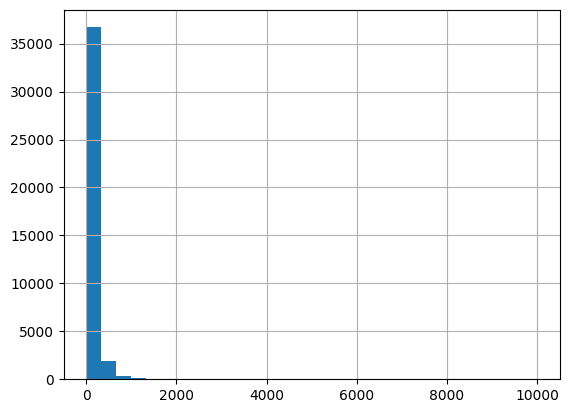

In [174]:
# target(hist)
train['price'].hist(bins=30)

참고) 여기에서의 hist함수는 판다스 내장 함수로 matplotlib를 임포트해오지 않아도 사용할수 있다   
> DataFrame의 column 데이터를 히스토그램으로 만든다
- 가격 예측이기때문에 타겟 피처는 price
- hist() 함수의 bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정

- 2000 넘는 부분에도 값이 있어서 이후로도 그래프가 저렇게 그려진다

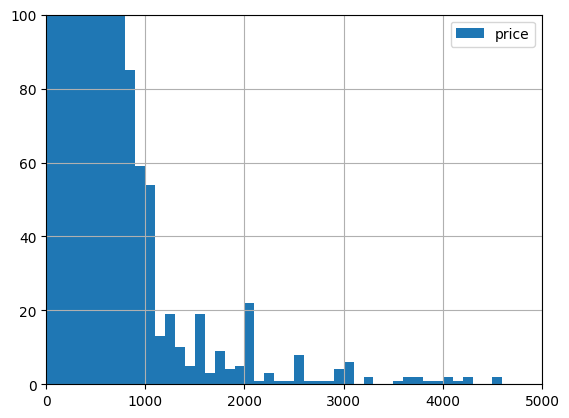

In [175]:
# price 5000까지만 줌해서 그래프 확인
import matplotlib.pyplot as plt
train['price'].hist(bins=100, legend=True)
plt.xlim(0, 5000)
plt.ylim(0, 100)
plt.show()

- 가격이 2000 이상인 데이터의 개수는 거의 20개 미만

In [176]:
# 가격 3000개 이상인 데이터의 정보 확인
train[train['price'] > 3000].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 622 to 39103
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38 non-null     int64  
 1   name                            38 non-null     object 
 2   host_id                         38 non-null     int64  
 3   host_name                       38 non-null     object 
 4   neighbourhood_group             38 non-null     object 
 5   neighbourhood                   38 non-null     object 
 6   latitude                        38 non-null     float64
 7   longitude                       38 non-null     float64
 8   room_type                       38 non-null     object 
 9   price                           38 non-null     int64  
 10  minimum_nights                  38 non-null     int64  
 11  number_of_reviews               38 non-null     int64  
 12  last_review                     17 non

In [177]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- 타겟 데이터 숫자형 특성의 통계값 확인

    - 10000부분에 값이 있고 -> 그래서 그래프 모양이 저렇게 나온거고
    - 데이터의 75%가 175 값이다

In [178]:
# feature (host_id)
train['host_id'].value_counts()

host_id
219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: count, Length: 30845, dtype: int64

- 에어비앤비 호스트별 데이터 개수 확인
    - 219517861 호스트가 256개의 에어비앤비를 운영중이다..? 

---
### 3. 데이터 전처리
- 데이터를 살펴보고 결측치 및 이상치 처리
#### 1) 결측치 전처리 - 결측치 삭제


In [179]:
# train, test data 결측치 컬럼 삭제 -  'last_review' 
train_clean = X_train.drop(['last_review'], axis=1)
test_clean = X_test.drop(['last_review'], axis=1)

display(train_clean.info())
print("*"*50)
display(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               31122 non-null  float64
 12  calculated_host_listings_count  

None

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  reviews_per_month               7721 non-nul

None

In [180]:
# check missing value after drop
display(train_clean.isnull().sum())
print("*"*50)
display(test_clean.isnull().sum())

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

**************************************************


id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### 2) 범주형 데이터 전처리(object)


In [181]:
# numpy를 이용해서 object타입 컬럼명 확인후 리스트에 저장
import numpy as np
o_train_data = train_clean.select_dtypes(exclude=np.number).columns.tolist()
o_test_data = test_clean.select_dtypes(exclude=np.number).columns.tolist()
print(o_train_data)
print(o_test_data)

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


- label encoding 적용
 

In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 위 리스트를 활용해서 반복문으로 레이블 인코딩 - 리스트 값이 같기때문에 train데이터 리스트로 활용
for col in o_train_data:
    train_clean[col] = le.fit_transform(train_clean[col])
    test_clean[col] = le.fit_transform(test_clean[col])

In [183]:
# 인코딩 결과 확인
for col in o_train_data:
    display(train_clean[col].head())
    display(test_clean[col].head())

0    29228
1    19434
2    36855
3    19041
4    33319
Name: name, dtype: int64

0    3178
1    8473
2    4697
3    7765
4    5755
Name: name, dtype: int64

0    3258
1    3811
2    7234
3    2704
4    3190
Name: host_name, dtype: int64

0    3229
1    2142
2    3400
3    3936
4     484
Name: host_name, dtype: int64

0    2
1    2
2    2
3    1
4    1
Name: neighbourhood_group, dtype: int64

0    1
1    2
2    1
3    1
4    2
Name: neighbourhood_group, dtype: int64

0     94
1     95
2    209
3     13
4     13
Name: neighbourhood, dtype: int64

0    187
1    177
2     35
3     35
4     83
Name: neighbourhood, dtype: int64

0    1
1    0
2    0
3    0
4    1
Name: room_type, dtype: int64

0    1
1    0
2    0
3    0
4    0
Name: room_type, dtype: int64

In [184]:
# 최종적으로 전체 정보로 다시 확인
display(train_clean.info())
display(test_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39116 non-null  int64  
 2   host_id                         39116 non-null  int64  
 3   host_name                       39116 non-null  int64  
 4   neighbourhood_group             39116 non-null  int64  
 5   neighbourhood                   39116 non-null  int64  
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  int64  
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               31122 non-null  float64
 12  calculated_host_listings_count  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9779 non-null   int64  
 2   host_id                         9779 non-null   int64  
 3   host_name                       9779 non-null   int64  
 4   neighbourhood_group             9779 non-null   int64  
 5   neighbourhood                   9779 non-null   int64  
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   int64  
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  reviews_per_month               7721 non-null   float64
 12  calculated_host_listings_count  97

None

#### 3) 수치형 데이터 스케일링 및 결측치 채우기
- 데이터스케일링 방식을 정하기 위해 정규분포 확인하고 싶었으나,
    - 전체 데이터에 대해 정규분포를 확인해야하는건지,
    - 정규분포를 확인하는 방법이 뭔지 정확하게 알지 못함
> 이상치의 영향을 최소화하고 모든 feature들이 같은 스케일을 갖는 RobustScaler를 사용하기로 결정

In [185]:
# 스케일링 
# 라이브러리 호출
from sklearn.preprocessing import RobustScaler

# RobustScaler 선언, 학습
robustScaler = RobustScaler().fit(train_clean)

# train set scaling
train_robust = robustScaler.transform(train_clean)
# to dataframe
train_robust = pd.DataFrame(train_robust, 
                            index=train_clean.index, 
                            columns=train_clean.columns)

# test set scaling
test_robust = robustScaler.transform(test_clean)
# to dataframe
test_robust = pd.DataFrame(test_robust, 
                            index=test_clean.index, 
                            columns=test_clean.columns)

In [186]:
# 스케일링 확인
display(train_robust.head())
print("*"*50)
display(test_robust.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.236941,0.523280,0.637654,-0.281927,0.0,0.000000,1.079076,-0.044181,1.0,0.25,-0.090909,-0.340659,1.0,-0.197368
1,-0.516067,0.012338,0.183795,-0.170006,0.0,0.007874,0.512585,-0.734646,0.0,0.00,2.681818,0.532967,1.0,0.951754
2,0.366841,0.921173,-0.303912,0.522769,0.0,0.905512,0.096153,-1.064618,0.0,14.50,-0.181818,-0.280220,0.0,-0.197368
3,-0.960274,-0.008164,-0.272411,-0.394050,-1.0,-0.637795,-0.435087,0.410010,0.0,0.50,10.636364,1.197802,1.0,-0.192982
4,-0.195344,0.736703,-0.183075,-0.295689,-1.0,-0.637795,-0.466497,0.004055,1.0,6.50,-0.227273,NaN,0.0,-0.197368


**************************************************


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.571788,-0.835720,0.030739,-0.287796,-1.0,0.732283,-0.183938,0.196788,1.0,0.25,-0.136364,-0.219780,0.0,-0.197368
1,-0.946425,-0.559486,-0.255027,-0.507792,0.0,0.653543,0.969481,-0.194867,0.0,0.25,7.000000,0.758242,0.0,0.872807
2,-0.974640,-0.756475,-0.305126,-0.253188,-1.0,-0.464567,-0.490776,-0.152607,0.0,-0.25,2.227273,-0.032967,3.0,1.403509
3,0.110504,-0.596421,-0.288932,-0.144708,-1.0,-0.464567,-0.471984,-0.098394,0.0,0.25,-0.136364,-0.318681,0.0,-0.197368
4,-0.307270,-0.701281,0.478078,-0.843352,0.0,-0.086614,1.134764,0.123793,0.0,-0.25,7.045455,1.978022,2.0,0.881579


In [187]:
# 결측치 채우기
train_robust.isnull().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [188]:
## 결측치 있는 컬럼별로 나눠서 해줘야함!
train_robust['reviews_per_month'] = train_robust['reviews_per_month'].fillna(train_robust['reviews_per_month'].mean())
train_robust.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

---
### 4. 검증데이터 분리 

In [189]:
from sklearn.model_selection import train_test_split
# train - validation 분리
X2_train, X2_val, y2_train, y_val = train_test_split(train_robust, y_train, test_size=0.2, random_state=77) 

---
### 5. 머신러닝
#### 1) Linear Regression

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

# linear regression 모델 학습
linear_r = LinearRegression()
linear_r.fit(X2_train, y2_train)
pred = linear_r.predict(X2_val)
# mse 오차 값 확인
linear_mse = mean_squared_error(y_val, pred)
linear_mse

43591.09247885149

#### 2) Ridge Regression

In [191]:
from sklearn.linear_model import Ridge

# Ridge regression 모델 학습
ridge_r = Ridge(random_state=77)
ridge_r.fit(X2_train, y2_train)
pred = ridge_r.predict(X2_val)

# check mse
ridge_mse = mean_squared_error(y_val, pred)
ridge_mse

43591.01687393708

---
#### 3) Lasso Regression

In [192]:
from sklearn.linear_model import Lasso

# Lasso regression 
lasso_r = Lasso(random_state=77)
lasso_r.fit(X2_train, y2_train)
pred = lasso_r.predict(X2_val)

# check mse
lasso_mse = mean_squared_error(y_val, pred)
lasso_mse

43565.706362845856

- GridSearchCV 로 하이퍼퍼라미터를 찾아서 학습시켜보기

In [193]:
from sklearn.model_selection import GridSearchCV

# hyper_parameter sample
hyper_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

hyper_param_tuner = GridSearchCV(lasso_r, hyper_params, cv=5)
hyper_param_tuner.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=77),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 1500, 2000]})

In [194]:
hyper_param_tuner.best_params_

{'alpha': 1, 'max_iter': 100}

In [195]:
# 구한 하이퍼파라미터 값으로 다시 모델 학습
lasso_r = Lasso(alpha=1, max_iter=100, random_state=77)
lasso_r.fit(X2_train, y2_train)
pred = lasso_r.predict(X2_val)

# check mse
lasso_mse = mean_squared_error(y_val, pred)
lasso_mse

43565.706362845856

- 처음부터 최적의 값이었나...? 값의 차이가 없다

---
#### 4) ElasticNet Regression

In [196]:
from sklearn.linear_model import ElasticNet

# ElasticNet
elastic_r = ElasticNet(random_state=77)
elastic_r.fit(X2_train, y2_train)
pred = elastic_r.predict(X2_val)

# check mse
elastic_mse = mean_squared_error(y_val, pred)
elastic_mse

44823.08946266039

#### 5) RandomForest Regression

In [197]:
from sklearn.ensemble import RandomForestRegressor

# RandomForest regression
forest_r = RandomForestRegressor(random_state=77)
forest_r.fit(X2_train, y2_train)
pred = forest_r.predict(X2_val)

# check mse
forest_mse = mean_squared_error(y_val, pred)
forest_mse

45237.548936413594

#### 6) XGBoost Regression

In [198]:
from xgboost import XGBRegressor

# XGBoost regresiion
xgb_r = XGBRegressor(random_state=77)
xgb_r.fit(X2_train, y2_train)
pred = xgb_r.predict(X2_val)

# check mse
xgb_mse = mean_squared_error(y_val,pred)
xgb_mse

44577.72940924817

In [199]:
# GridSearchCV 로 하이퍼파라미터 찾기
xgb_hyper_params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

hyper_param_tuner = GridSearchCV(xgb_r, xgb_hyper_params, cv=5)
hyper_param_tuner.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=77, ...),
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [200]:
# 최적의 파라미터 값 확인
hyper_param_tuner.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

In [201]:
# 위 하이퍼파라미터 값으로 다시 모델 학습
# XGBoost regresiion
xgb_r = XGBRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7, random_state=77)
xgb_r.fit(X2_train, y2_train)
pred = xgb_r.predict(X2_val)

# check mse
xgb_mse = mean_squared_error(y_val,pred)
xgb_mse

39165.102413948356

- 오! 확연하게 오차값이 줄었다!
    - 첫 mse : 44577.72940924817
    - 하이퍼파라미터 지정 mse : 39165.102413948356
        - {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

---
### 6. 채점
- mse로 확인

In [202]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/y_test.csv')

# Xgboost
pred = xgb_r.predict(test_robust)

In [203]:
grade_mse = mean_squared_error(y_test, pred)
grade_mse

46359.83907773896

### baseline score 보다 낮게 도전

In [204]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요! 
print(f"나의 점수는 (MSE {grade_mse})입니다.")

나의 점수는 (MSE 46359.83907773896)입니다.


## 회고
[KEEP]   
- 머신러닝을 처음부터 끝까지 실행해보는 첫 시도였는데 차분하게 하나씩 단계를 정리해가며 진행   
- 노드에서 했던 것들을 그대로 복사해와서 출력값만 만들어내지 않고, 어떤 과정으로 진행하는지 짚어가려고 노력함

[PROBLEM]   
- EDA를 어떤식으로 진행해야하는지 아직 감이 오지 않아서 어떤 데이터를, 어떤 방식으로 확인해서, 어떻게 수정해가야하는지 방향을 잡는게 어려움   
- 시각화해서 자료를 파악하고 싶었는데, 아직 matplotlib나 seaborn을 이용하는게 어려움   
- 어떤 값이 나와야 학습이 잘된건지 중간에 확인 해보고 싶었지만 방법을 알지 못했고, 결과값에 대해서도 확신이 들지 않음

[TRY]   
- EDA를 시각화를 통해 진행하는 연습   

---
## [추가]성능향상 팁 영상보고 추가 모델학습 후 mse 재확인
[수정내용]
- 타겟 데이터 로그함수 적용
- 범주형 데이터 unique값에 따라 일부 컬럼 삭제

### 데이터 불러오기

In [41]:
# import library
import pandas as pd

# import data
train = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/train.csv')
test = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/test.csv')


<Axes: >

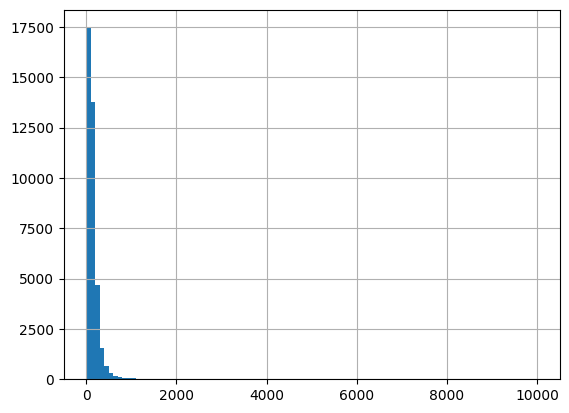

In [42]:
# target(hist)
train['price'].hist(bins=100)

❗️이렇게 타겟데이터가 좌측에 쏠려있는 경우엔 데이터 값을 로그치환 해주면 좋다
> 왜?
- 타겟값에 로그 변환을 취하는 이유는 타겟값의 분포가 롱테일(long tail)형태로 불균일할 때 사용
- 즉 회귀예측에서 타겟값이 평균값보다 아주 높은 값들이 일정 수준 존재할 때 이들에 대한 영향도를 모델에서 줄이기 위해 사용
    > log 변환은 1) 큰 수를 작게 만들기 위해   2) 복잡한 계산을 간편하게 사용하기 위해

In [43]:
import numpy as np
# 원래 타겟 데이터 값
print(train['price'][:3])
# 로그치환은 np.log1p() 함수 활용
print(np.log1p(train['price'])[:3])
# np.expm1()함수를 쓰면 로그치환된 데이터를 원상복귀할수 있음
print(np.expm1(np.log1p(train['price'])[:3]))

0     70
1    240
2    150
Name: price, dtype: int64
0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<Axes: >

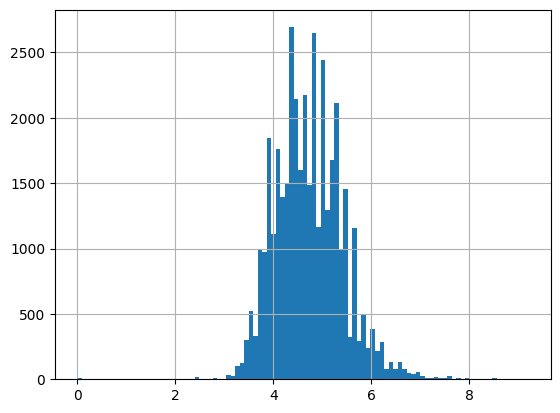

In [44]:
# 타겟 데이터 로그치환
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

- 타겟 데이터 분포가 정규분포에 가깝게 변환된걸 확인할수 있다.
> 데이터가 정규분포에 따르면 머신러닝에서 모델이 예측하기에 좋다고 한다

In [45]:
# 변수명 변환
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test

In [46]:
# shape 확인
y_test = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/y_test.csv')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39116, 15), (9779, 15), (39116,), (9779, 1))

### 데이터 전처리
#### 1) 결측치 컬럼 삭제

In [47]:
# train, test data 결측치 컬럼 삭제 -  'last_review' 
train_clean = X_train.drop(['last_review'], axis=1)
test_clean = X_test.drop(['last_review'], axis=1)

display(train_clean.info())
print("*"*50)
display(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               31122 non-null  float64
 12  calculated_host_listings_count  

None

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  reviews_per_month               7721 non-nul

None

In [48]:
# check missing value after drop
display(train_clean.isnull().sum())
print("*"*50)
display(test_clean.isnull().sum())

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

**************************************************


id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [49]:
# reviews_per_month 에서 결측값은 0으로 채운다
train_clean['reviews_per_month'] = train_clean['reviews_per_month'].fillna(0)
test_clean['reviews_per_month'] = test_clean['reviews_per_month'].fillna(0)

In [50]:
# 결측치 확인
train_clean.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### 2) 범주형데이터 전처리(object)
- unique 값을 확인해서 값이 많은 컬럼은 삭제
> 왜?
- 범주형 열에 unique value가 많으면 레이블인코딩이나 one-hot 인코딩을 할때 데이터 차원이 엄청나게 커지게 된다
    - 데이터 차원이 커지면 학습속도가 느려지고, 과적합 원인이 됨
- unique value가 많은 컬럼은 제외시키고 인코딩을 하면 차원을 유지/균형을 맞추는데 도움이 됨

In [51]:
train_clean.select_dtypes(include='object').describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [52]:
# name, host_name 컬럼 삭제
del_cols =['name','host_name']
train_clean = train_clean.drop(del_cols, axis=1)
test_clean = test_clean.drop(del_cols, axis=1)

In [53]:
## label encoding
# object타입 컬럼명 리스트로 저장
o_train_data = train_clean.select_dtypes(include='object').columns.tolist()
o_test_data = test_clean.select_dtypes(include='object').columns.tolist()
print(o_train_data)
print(o_test_data)

['neighbourhood_group', 'neighbourhood', 'room_type']
['neighbourhood_group', 'neighbourhood', 'room_type']


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 위 리스트를 활용해서 반복문으로 레이블 인코딩 - 리스트 값이 같기때문에 train데이터 리스트로 활용
for col in o_train_data:
    train_clean[col] = le.fit_transform(train_clean[col])
    test_clean[col] = le.fit_transform(test_clean[col])

In [55]:
# 최종 데이터 타입 확인
display(train_clean.info())
display(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   host_id                         39116 non-null  int64  
 2   neighbourhood_group             39116 non-null  int64  
 3   neighbourhood                   39116 non-null  int64  
 4   latitude                        39116 non-null  float64
 5   longitude                       39116 non-null  float64
 6   room_type                       39116 non-null  int64  
 7   minimum_nights                  39116 non-null  int64  
 8   number_of_reviews               39116 non-null  int64  
 9   reviews_per_month               39116 non-null  float64
 10  calculated_host_listings_count  39116 non-null  int64  
 11  availability_365                39116 non-null  int64  
dtypes: float64(3), int64(9)
memory u

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   host_id                         9779 non-null   int64  
 2   neighbourhood_group             9779 non-null   int64  
 3   neighbourhood                   9779 non-null   int64  
 4   latitude                        9779 non-null   float64
 5   longitude                       9779 non-null   float64
 6   room_type                       9779 non-null   int64  
 7   minimum_nights                  9779 non-null   int64  
 8   number_of_reviews               9779 non-null   int64  
 9   reviews_per_month               9779 non-null   float64
 10  calculated_host_listings_count  9779 non-null   int64  
 11  availability_365                9779 non-null   int64  
dtypes: float64(3), int64(9)
memory usa

None

#### 3) 수치형 데이터 스케일링
- 타겟 데이터가 정규분포를 따르니까 StandardScaler를 써보려고 한다

In [56]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 선언, 학습
scaler = StandardScaler().fit(train_clean)

# train set scaling
train_scaled = scaler.transform(train_clean)
# to dataframe
train_scaled = pd.DataFrame(train_scaled, 
                            index=train_clean.index, 
                            columns=train_clean.columns)

# test set scaling
test_scaled = scaler.transform(test_clean)
# to dataframe
test_scaled = pd.DataFrame(test_scaled, 
                            index=test_clean.index, 
                            columns=test_clean.columns)

In [57]:
# 스케일링 확인
display(train_scaled.head())
print("*"*50)
display(test_scaled.head())

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.365787,0.335962,0.442811,-0.187637,1.336232,-0.122644,0.90643,-0.196490,-0.454665,-0.625932,-0.155868,-0.858043
1,-0.866555,-0.237602,0.442811,-0.173058,0.578404,-0.820543,-0.92516,-0.245726,0.913398,0.367351,-0.155868,1.131740
2,0.717432,-0.853940,0.442811,1.488925,0.021318,-1.154068,-0.92516,2.610001,-0.499519,-0.557215,-0.186486,-0.858043
3,-1.663486,-0.814130,-0.916871,-1.368519,-0.689353,0.336438,-0.92516,-0.147253,4.838168,1.123245,-0.155868,-0.850449
4,-0.291160,-0.701233,-0.916871,-1.368519,-0.731373,-0.073888,0.90643,1.034427,-0.521946,-0.682156,-0.186486,-0.858043


**************************************************


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.085119,-0.431026,-0.916871,1.168192,-0.353376,0.120920,0.90643,-0.196490,-0.477092,-0.488497,-0.186486,-0.858043
1,-1.638641,-0.792161,0.442811,1.022404,1.189621,-0.274952,-0.92516,-0.196490,3.043988,0.623480,-0.186486,0.995037
2,-1.689260,-0.855474,-0.916871,-1.047786,-0.763851,-0.232237,-0.92516,-0.294963,0.689126,-0.276097,-0.094632,1.913983
3,0.257549,-0.835009,-0.916871,-1.047786,-0.738713,-0.177440,-0.92516,-0.196490,-0.477092,-0.600944,-0.186486,-0.858043
4,-0.491960,0.134298,0.442811,-0.348003,1.410731,0.047139,-0.92516,-0.294963,3.066415,2.010329,-0.125250,1.010227


### 검증데이터 분리

In [58]:
from sklearn.model_selection import train_test_split
# train - validation 분리
X2_train, X2_val, y2_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=39) 

In [59]:
# shape
X2_train.shape, X2_val.shape, y2_train.shape, y_val.shape

((31292, 12), (7824, 12), (31292,), (7824,))

### 머신러닝
- 모델은 lasso, randomforest, xgboost를 사용

In [60]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 

# Lasso regression 
lasso_r = Lasso(random_state=39)
lasso_r.fit(X2_train, y2_train)
pred = lasso_r.predict(X2_val)
# 로그함수 적용했던 데이터 다시 치환!
pred = np.expm1(pred)

# check mse
lasso_mse = mean_squared_error(y_val, pred)
lasso_mse

11736.194869948775

- 3모델중 가장 mse 값이 작으니까 하이퍼파라미터를 찾아서 다시 해봄

In [70]:
# GridSearchCV 로 하이퍼파라미터 찾기
# from sklearn.model_selection import GridSearchCV

lasso_hyper_params={
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

hyper_param_tuner = GridSearchCV(lasso_r, lasso_hyper_params, cv=5)
hyper_param_tuner.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=39),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 1500, 2000]})

In [71]:
hyper_param_tuner.best_params_

{'alpha': 0.01, 'max_iter': 100}

In [72]:
# 구한 하이퍼파라미터 값으로 다시 모델 학습
lasso_r = Lasso(alpha=0.01, max_iter=100, random_state=39)
lasso_r.fit(X2_train, y2_train)
pred = lasso_r.predict(X2_val)
# 로그함수 적용했던 데이터 다시 치환!
pred = np.expm1(pred)

# check mse
lasso_mse = mean_squared_error(y_val, pred)
lasso_mse

17213.457997736394

- 희한하게 하이퍼파라미터로 학습한 모델이 더 안좋다..?

In [61]:
# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor

# RandomForest regression
forest_r = RandomForestRegressor(random_state=77)
forest_r.fit(X2_train, y2_train)
pred = forest_r.predict(X2_val)
# 로그함수 적용했던 데이터 다시 치환!
pred = np.expm1(pred)

# check mse
forest_mse = mean_squared_error(y_val, pred)
forest_mse

24607.658097788706

In [62]:
# XGBoost Regression
from xgboost import XGBRegressor

# XGBoost regresiion
xgb_r = XGBRegressor(random_state=77)
xgb_r.fit(X2_train, y2_train)
pred = xgb_r.predict(X2_val)
# 로그함수 적용했던 데이터 다시 치환!
pred = np.expm1(pred)

# check mse
xgb_mse = mean_squared_error(y_val,pred)
xgb_mse

24118.682870113356

In [63]:
# GridSearchCV 로 하이퍼파라미터 찾기
from sklearn.model_selection import GridSearchCV

xgb_hyper_params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

hyper_param_tuner = GridSearchCV(xgb_r, xgb_hyper_params, cv=5)
hyper_param_tuner.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=77, ...),
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [64]:
# 최적의 파라미터 값 확인
hyper_param_tuner.best_params_

{'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

In [65]:
# 위 하이퍼파라미터 값으로 다시 모델 학습
# XGBoost regresiion
xgb_r = XGBRegressor(
    learning_rate=0.07, max_depth=7, n_estimators=200, subsample=0.8, random_state=77)
xgb_r.fit(X2_train, y2_train)
pred = xgb_r.predict(X2_val)
# 로그함수 적용했던 데이터 다시 치환!
pred = np.expm1(pred)

# check mse
xgb_mse = mean_squared_error(y_val,pred)
xgb_mse

22421.49562109492

- ~노드 mse는 만자리수였는데 뭔가가 잘못된건지 모르겠다...?~
- 로그함수로 데이터 치환했던걸 다시 돌려놓지 않아서 소수점으로 나왔던 것! np.expm1() 적용

In [68]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/Users/seullee/Documents/STUDY-AI/Aiffel/basic_ML/Project_Airbnb/data/y_test.csv')

# Xgboost
pred = xgb_r.predict(test_scaled)
pred = np.expm1(pred)

In [69]:
grade_mse = mean_squared_error(y_test, pred)
grade_mse

43486.36982500672

- 예상한만큼 크게 향상되지는 않았지만 어쨌든 첫 시도보다 더 낮은 mse값이 나왔다

In [73]:
# lasso
pred = lasso_r.predict(test_scaled)
pred = np.expm1(pred)

grade_mse = mean_squared_error(y_test, pred)
grade_mse

50487.97127849591

- 라쏘모델보다 xgboost모델이 더 좋은 예측을 한다!

---

## 2차 회고
[KEEP]
- 데이터를 들여다보는 걸 귀찮아하지 않고 다시 모델학습을 시도해봄
- 오류가 난 지점에 대해 천천히 어떤 부분이 잘못 되었는지 따라가면서 확인하고 답을 찾아냄(np.expm1())
 
[PROBLEM]
- 데이터 값을 로그치환해준 경우 다시 원상태 값으로 변환하는 작업을 해야하는데 이부분을 놓쳐서 mse값이 소수점 한자리 값으로 나옴  
   
[TRY]
- 데이터를 변환하는 과정에서 추후 작업이 필요한 경우엔 코드에 주석을 달아둔 코드셀을 만들어서 잊지 않도록 해본다